### 需求：股票分析
- 使用tushare包获取某股票的历史行情数据。
- 输出该股票所有收盘比开盘上涨3%以上的日期。
- 输出该股票所有开盘比前日收盘跌幅超过2%的日期。
- 假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？

- tushare财经数据接口包
    - pip install tushare

In [1]:
import tushare as ts
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

In [2]:
#获取某只股票的历史行情数据
#code:字符串形式的股票代码
df = ts.get_k_data(code='600519',start='2000-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519
...,...,...,...,...,...,...,...
4988,2022-07-11,1990.200,1963.600,1994.770,1950.500,23949.00,600519
4989,2022-07-12,1965.000,1948.410,1972.800,1930.060,23447.00,600519
4990,2022-07-13,1945.000,1958.890,1972.000,1940.670,19854.00,600519
4991,2022-07-14,1960.000,1953.000,1976.800,1941.000,20527.00,600519


In [3]:
#将互联网上获取的股票数据存储到本地
df.to_csv('./maotai.csv')#调用to_xxx方法将df中的数据写入到本地进行存储

In [5]:
#将本地存储的数据读入到df
df = pd.read_csv('./maotai.csv')
df.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519


In [ ]:
#需要对读取出来的数据进行相关的处理

In [6]:
#删除df中指定的一列
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [7]:
#查看每一列的数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4993 non-null   object 
 1   open    4993 non-null   float64
 2   close   4993 non-null   float64
 3   high    4993 non-null   float64
 4   low     4993 non-null   float64
 5   volume  4993 non-null   float64
 6   code    4993 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 273.2+ KB


In [8]:
#将date列转为时间序列类型
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4993 non-null   datetime64[ns]
 1   open    4993 non-null   float64       
 2   close   4993 non-null   float64       
 3   high    4993 non-null   float64       
 4   low     4993 non-null   float64       
 5   volume  4993 non-null   float64       
 6   code    4993 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 273.2 KB


In [10]:
#将date列作为源数据的行索引
df.set_index('date',inplace=True)

In [11]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519


In [24]:
#输出该股票所有收盘比开盘上涨3%以上的日期
#伪代码：（收盘-开盘）/开盘 > 0.03
(df['open'] - df['close']) / df['open'] > 0.03

#在分析的过程中如果产生了boolean值则下一步马上将布尔值作为源数据的行索引
 #如果布尔值作为df的行索引，则可以取出true对应的行数据，忽略false对应的行数据
df.loc[(df['open'] - df['close']) / df['open'] > 0.03] #获取了True对应的行数据（满足需求的行数据）

df.loc[(df['open'] - df['close']) / df['open'] > 0.03].index #df的行数据

DatetimeIndex(['2001-10-10', '2001-11-07', '2001-11-16', '2001-12-20',
               '2002-01-04', '2002-01-17', '2002-01-28', '2002-04-17',
               '2002-11-08', '2003-01-02',
               ...
               '2018-06-27', '2018-07-02', '2018-08-17', '2018-10-08',
               '2018-10-10', '2018-10-23', '2019-07-03', '2019-09-11',
               '2019-11-29', '2020-01-03'],
              dtype='datetime64[ns]', name='date', length=165, freq=None)

In [30]:
#输出该股票所有开盘比前日收盘跌幅超过2%的日期
#伪代码：(开盘-前日收盘)/前日收盘 < -0.02
(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02
#将布尔值作为源数据的行索引取出True对应的行数据
df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02]

df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02].index

DatetimeIndex(['2001-09-12', '2002-06-26', '2002-12-13', '2004-07-01',
               '2004-10-29', '2006-08-21', '2006-08-23', '2007-01-25',
               '2007-02-01', '2007-02-06', '2007-03-19', '2007-05-21',
               '2007-05-30', '2007-06-05', '2007-07-27', '2007-09-05',
               '2007-09-10', '2008-03-13', '2008-03-17', '2008-03-25',
               '2008-03-27', '2008-04-22', '2008-04-23', '2008-04-29',
               '2008-05-13', '2008-06-10', '2008-06-13', '2008-06-24',
               '2008-06-27', '2008-08-11', '2008-08-19', '2008-09-23',
               '2008-10-10', '2008-10-15', '2008-10-16', '2008-10-20',
               '2008-10-23', '2008-10-27', '2008-11-06', '2008-11-12',
               '2008-11-20', '2008-11-21', '2008-12-02', '2009-02-27',
               '2009-03-25', '2009-08-13', '2010-04-26', '2010-04-30',
               '2011-08-05', '2012-03-27', '2012-08-10', '2012-11-22',
               '2012-12-04', '2012-12-24', '2013-01-16', '2013-01-25',
      

- 需求：假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？
- 分析：
    - 时间节点：2010-2020
    - 一手股票：100支股票
    - 买：
        - 一个完整的年需要买入1200支股票
    - 卖：
        - 一个完整的年需要卖出1200支股票
    - 买卖股票的单价：
        - 开盘价

In [32]:
new_df = df['2010-01':'2020-02']
new_df

,open,close,high,low,volume,code
date,,,,,,
2010-01-04,109.760,108.446,109.760,108.044,44304.88,600519
2010-01-05,109.116,108.127,109.441,107.846,31513.18,600519
2010-01-06,107.840,106.417,108.165,106.129,39889.03,600519
2010-01-07,106.417,104.477,106.691,103.302,48825.55,600519
2010-01-08,104.655,103.379,104.655,102.167,36702.09,600519
2010-01-11,104.400,102.926,105.230,102.422,24461.03,600519
2010-01-12,103.028,105.708,106.040,102.492,31063.40,600519
2010-01-13,104.649,103.022,105.389,102.741,37924.44,600519
2010-01-14,103.379,107.552,107.974,103.379,46454.64,600519


In [34]:
new_df.head(2)

,open,close,high,low,volume,code
date,,,,,,
2010-01-04,109.760,108.446,109.760,108.044,44304.88,600519
2010-01-05,109.116,108.127,109.441,107.846,31513.18,600519


In [36]:
#买股票：找每个月的第一个交易日对应的行数据（捕获到开盘价）==》每月的第一行数据
#根据月份从原始数据中提取指定的数据
#每月第一个交易日对应的行数据
df_monthly = new_df.resample('M').first()#数据的重新取样
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2010-01-31,109.760,108.446,109.760,108.044,44304.88,600519
2010-02-28,107.769,107.776,108.216,106.576,29655.94,600519
2010-03-31,106.219,106.085,106.857,105.925,21734.74,600519
2010-04-30,101.324,102.141,102.422,101.311,23980.83,600519
2010-05-31,81.676,82.091,82.678,80.974,23975.16,600519
2010-06-30,84.075,84.637,85.166,83.278,23525.57,600519
2010-07-31,81.586,81.057,81.586,80.725,7449.69,600519
2010-08-31,89.296,92.465,93.567,89.296,42965.73,600519
2010-09-30,102.288,101.052,103.834,100.420,25589.00,600519


In [38]:
#买入股票花费的总金额
cost = df_monthly['open'].sum()*100
cost

4010206.1

In [41]:
#卖出股票到手的钱
#特殊情况：2020年买入的股票卖不出去
new_df.resample('A').last()
#将2020年最后一行切出去
df_yearly = new_df.resample('A').last()[:-1]
df_yearly

,open,close,high,low,volume,code
date,,,,,,
2010-12-31,117.103,118.469,118.701,116.620,46084.0,600519
2011-12-31,138.039,138.468,139.600,136.105,29460.0,600519
2012-12-31,155.208,152.087,156.292,150.144,51914.0,600519
2013-12-31,93.188,96.480,97.179,92.061,57546.0,600519
2014-12-31,157.642,161.056,161.379,157.132,46269.0,600519
2015-12-31,207.487,207.458,208.704,207.106,19673.0,600519
2016-12-31,317.239,324.563,325.670,317.239,34687.0,600519
2017-12-31,707.948,687.725,716.329,681.918,76038.0,600519
2018-12-31,563.300,590.010,596.400,560.000,63678.0,600519


In [42]:
#卖出股票到手的钱
resv = df_yearly['open'].sum()*1200
resv

4368184.8

In [44]:
#最后手中剩余的股票需要估量其价值计算到总收益中
#使用昨天的收盘价作为剩余股票的单价
last_monry = 200*new_df['close'][-1]

In [45]:
#计算总收益
resv+last_monry-cost

574778.6999999997

### 需求：双均线策略制定

- 使用tushare包获取某股票的历史行情数据

In [12]:
df = pd.read_csv('./maotai.csv').drop(labels='Unnamed: 0',axis=1)
df

,date,open,close,high,low,volume,code
0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519
...,...,...,...,...,...,...,...
4988,2022-07-11,1990.200,1963.600,1994.770,1950.500,23949.00,600519
4989,2022-07-12,1965.000,1948.410,1972.800,1930.060,23447.00,600519
4990,2022-07-13,1945.000,1958.890,1972.000,1940.670,19854.00,600519
4991,2022-07-14,1960.000,1953.000,1976.800,1941.000,20527.00,600519


In [13]:
#将date列转为时间序列且将其作为源数据的行索引
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.set_index('date',inplace=True)

In [15]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519


- 计算该股票历史数据的5日均线和30日均线
    - 什么是均线？
        - 对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。移动平均线常用线有5天、10天、30天、60天、120天和240天的指标。
       - 5天和10天的是短线操作的参照指标，称做日均线指标；
       - 30天和60天的是中期均线指标，称做季均线指标；
       - 120天和240天的是长期均线指标，称做年均线指标。
    - 均线计算方法：MA=（C1+C2+C3+...+Cn)/N C:某日收盘价 N:移动平均周期（天数）

In [16]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()

In [17]:
ma5

date
2001-08-27          NaN
2001-08-28          NaN
2001-08-29          NaN
2001-08-30          NaN
2001-08-31    -112.6662
                ...    
2022-07-11    1997.5220
2022-07-12    1980.6020
2022-07-13    1971.9800
2022-07-14    1964.5800
2022-07-15    1954.6800
Name: close, Length: 4993, dtype: float64

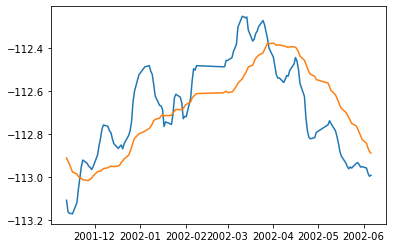

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ma5[50:180])
plt.plot(ma30[50:180])

- 分析输出所有金叉日期和死叉日期
    - 股票分析技术中的金叉和死叉，可以简单解释为：
        - 分析指标中的两根线，一根为短时间内的指标线，另一根为较长时间的指标线。
        - 如果短时间的指标线方向拐头向上，并且穿过了较长时间的指标线，这种状态叫“金叉”；
        - 如果短时间的指标线方向拐头向下，并且穿过了较长时间的指标线，这种状态叫“死叉”；
        - 一般情况下，出现金叉后，操作趋向买入；死叉则趋向卖出。当然，金叉和死叉只是分析指标之一，要和其他很多指标配合使用，才能增加操作的准确性。

In [69]:
ma5 = ma5[30:]
ma30 = ma30[30:]

In [72]:
s1 = ma5 < ma30
s2 = ma5 > ma30

In [ ]:
df = df[30:]

In [87]:
death_ex = s1 & s2.shift(1) #判定死叉的条件
df.loc[death_ex] #死叉对应的行数据
death_date = df.loc[death_ex].index

In [91]:
golden_ex = ~(s1 | s2.shift(1))#判定金叉的条件
golden_date = df.loc[golden_ex].index #金叉的时间

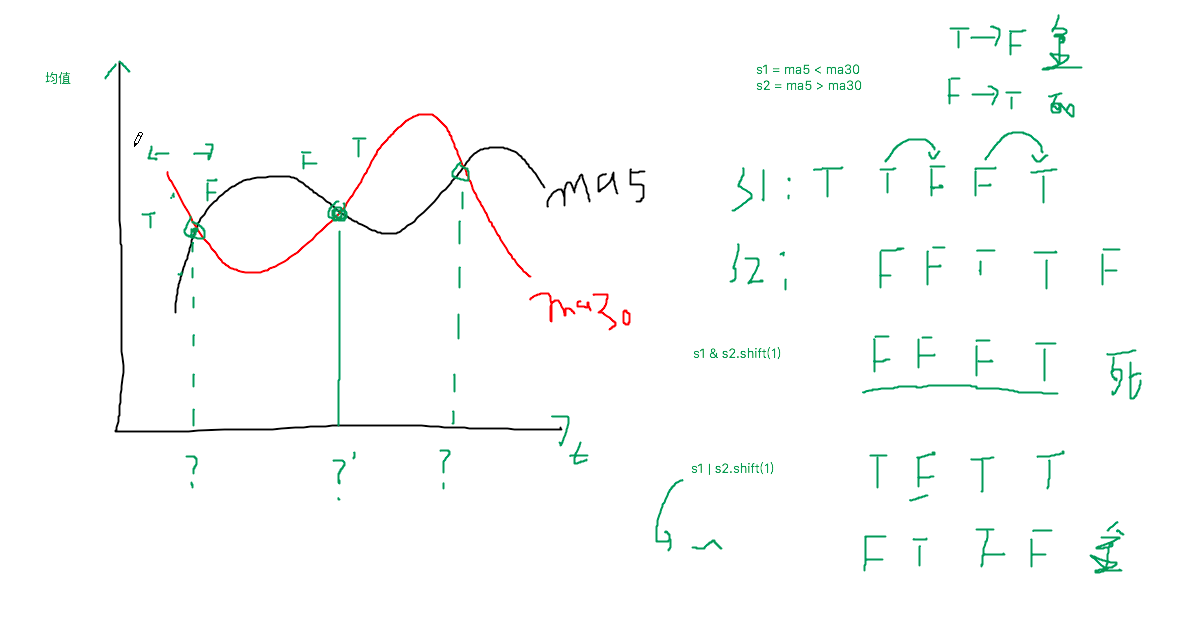

- 如果我从假如我从2010年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？
- 分析：
    - 买卖股票的单价使用开盘价
    - 买卖股票的时机
    - 最终手里会有剩余的股票没有卖出去
        - 会有。如果最后一天为金叉，则买入股票。估量剩余股票的价值计算到总收益。
            - 剩余股票的单价就是用最后一天的收盘价。

In [109]:
s1 = Series(data=1,index=golden_date) #1作为金叉的标识
s2 = Series(data=0,index=death_date) #0作为死叉的标识

s = s1.append(s2)
s = s.sort_index() #存储的是金叉和死叉对应的时间

In [111]:
s = s['2010':'2020']##存储的是金叉和死叉对应的时间

In [135]:
first_monry = 100000 #本金，不变
money = first_monry #可变的，买股票话的钱和卖股票收入的钱都从该变量中进行操作
hold = 0 #持有股票的数量（股数：100股=1手）

for i in range(0,len(s)): #i表示的s这个Series中的隐式索引
    #i = 0(死叉：卖) = 1（金叉：买）
    if s[i] == 1:#金叉的时间
        #基于100000的本金尽可能多的去买入股票
        #获取股票的单价（金叉时间对应的行数据中的开盘价）
        time = s.index[i] #金叉的时间
        p = df.loc[time]['open'] #股票的单价
        hand_count = money // (p*100) #使用100000最多买入多少手股票
        hold = hand_count * 100 
        
        money -= (hold * p) #将买股票话的钱从money中减去
    else:
        #将买入的股票卖出去
        
        #找出卖出股票的单价
        death_time = s.index[i]
        p_death = df.loc[death_time]['open'] #卖股票的单价
        money += (p_death * hold) #卖出的股票收入加入到money
        hold = 0

#如何判定最后一天为金叉还是死叉
last_monry = hold * df['close'][-1] #剩余股票的价值

#总收益
money + last_monry - first_monry

1501254.9999999995

- 聚宽